In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
x = np.random.normal(0,1,500)

In [4]:
sns.set_style('whitegrid')

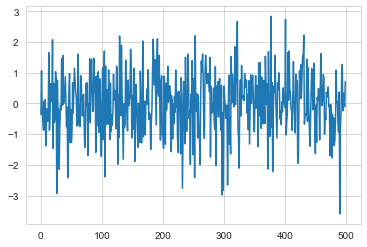

In [6]:
p = plt.plot(x)

In [26]:
# y = m0 + m1 x + m2 x^2 + ......
y2 = np.random.normal(0,1,500) + (3*x) + (-3*(x**2))
y3 = np.random.normal(0,1,500) + (3*x) + (-3*(x**2)) + (2*(x**3))
y4 = np.random.normal(0,1,500) + (3*x) + (-3*(x**2)) + (2*(x**3))+(-4*(x**4))

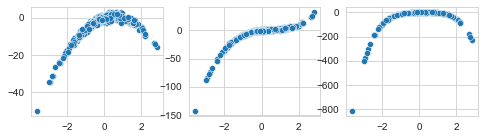

In [27]:
plt.figure(figsize=(8,2))
plt.subplot(1,3,1)
p = sns.scatterplot(x=x,y=y2)
plt.subplot(1,3,2)
p = sns.scatterplot(x=x,y=y3)
plt.subplot(1,3,3)
p = sns.scatterplot(x=x,y=y4)

In [31]:
xdf = pd.DataFrame(x, columns=['feats'])
xdf.head(1)

,feats
0,-0.365048


In [32]:
y2s = pd.Series(y2)
y3s = pd.Series(y3)
y4s = pd.Series(y4)

In [34]:
from sklearn.model_selection import train_test_split

In [36]:
xtrain,xtest,ytrain,ytest = train_test_split(xdf,y3s,
                                test_size=0.2,random_state=100)

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
model = LinearRegression().fit(xtrain,ytrain)

In [40]:
model.score(xtest,ytest)*100

59.604462447332764

In [41]:
ypred = model.predict(xtest)

In [46]:
xtest.head(1)

,feats
69,0.197768


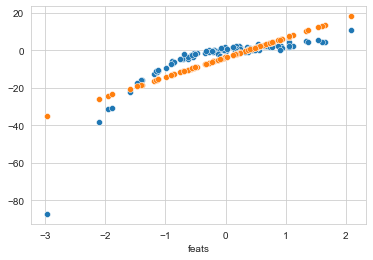

In [50]:
sns.scatterplot(x='feats',y=ytest, data=xtest)
sns.scatterplot(x='feats',y=ypred, data=xtest)

In [51]:
from sklearn.preprocessing import PolynomialFeatures as pf

In [59]:
x1 = pd.DataFrame(pf(degree=1).fit_transform(xdf))
x2 = pd.DataFrame(pf(degree=2).fit_transform(xdf))
x3 = pd.DataFrame(pf(degree=3).fit_transform(xdf))

In [58]:
xdf.head(2)

,feats
0,-0.365048
1,1.064401


In [57]:
x1.head(2)

,0,1
0,1.0,-0.365048
1,1.0,1.064401


In [60]:
x2.head(2)

,0,1,2
0,1.0,-0.365048,0.133260
1,1.0,1.064401,1.132949


In [61]:
model_1 = LinearRegression().fit(x1,y3s)
model_2 = LinearRegression().fit(x2,y3s)
model_3 = LinearRegression().fit(x3,y3s)

In [63]:
model_1.score(x1,y3s)*100

60.775925877243296

In [64]:
model_2.score(x2,y3s)*100

84.60036394702051

In [65]:
model_3.score(x3,y3s)*100

99.42753691715909

In [66]:
ypred_3 = model_3.predict(x3)

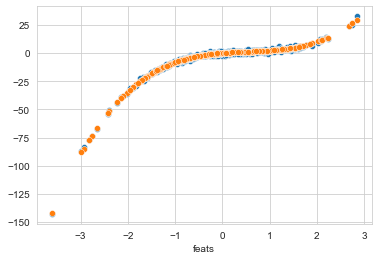

In [67]:
sns.scatterplot(x='feats',y=y3s, data=xdf)
sns.scatterplot(x='feats',y=ypred_3, data=xdf)

### Lets do the elbow method to Create Polynomial Model

In [68]:
x = np.random.normal(0,1,500)
y3 = np.random.normal(0,1,500) + (3*x) + (-3*(x**2)) + (2*(x**3))

In [69]:
xdf = pd.DataFrame(x,columns=['feats'])
y3s = pd.Series(y3)

In [72]:
scores = []
for deg in range(1,11):
    x_poly = pf(degree=deg).fit_transform(xdf)
    model_d = LinearRegression().fit(x_poly, y3s)
    scores += [model_d.score(x_poly,y3s)*100]

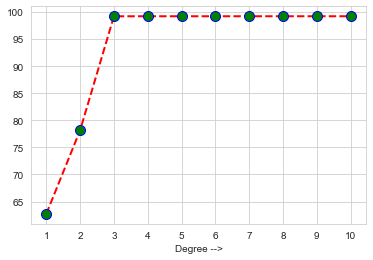

In [82]:
plt.plot(range(1,11),scores, marker='o',lw=2,color='r',
         markeredgecolor='b',markerfacecolor='g',ls='--',markersize=10)
plt.xticks(range(1,11))
plt.xlabel('Degree -->')
plt.show()

### STARTUP PROFIT PREDICTION

In [83]:
df = pd.read_csv('50_Startups.csv')

In [84]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [87]:
df.describe(include='all')

,R&D Spend,Administration,Marketing Spend,State,Profit
count,50.000000,50.000000,50.000000,50,50.000000
unique,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,New York,NaN
freq,NaN,NaN,NaN,17,NaN
mean,73721.615600,121344.639600,211025.097800,NaN,112012.639200
std,45902.256482,28017.802755,122290.310726,NaN,40306.180338
min,0.000000,51283.140000,0.000000,NaN,14681.400000
25%,39936.370000,103730.875000,129300.132500,NaN,90138.902500
50%,73051.080000,122699.795000,212716.240000,NaN,107978.190000
75%,101602.800000,144842.180000,299469.085000,NaN,139765.977500


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [88]:
df['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

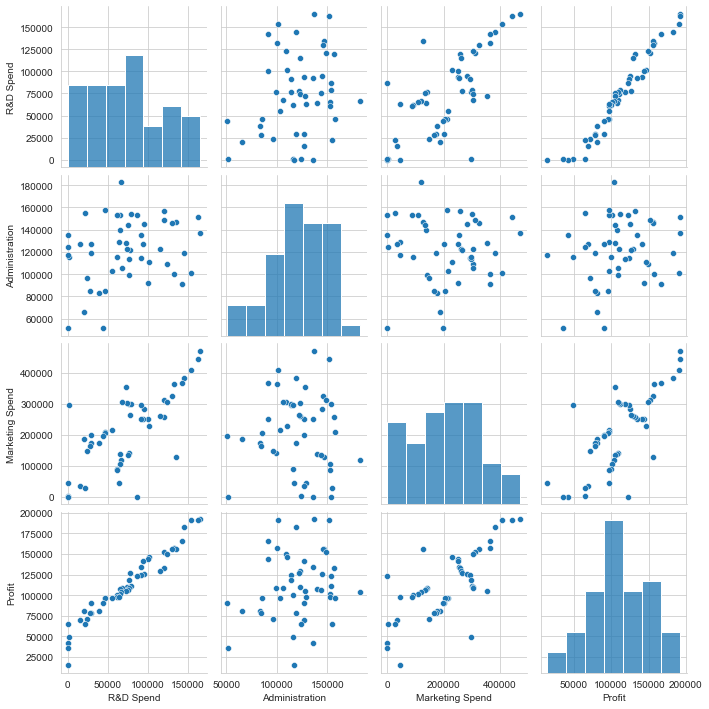

In [90]:
s = sns.pairplot(df)

In [100]:
x = df.drop(['Profit','Administration','State'],axis=1)
y = df['Profit']

model = LinearRegression().fit(x,y)
print('Simple Linear Model Score:',model.score(x,y)*100)

x_poly = pf(3).fit_transform(x)
model_poly = LinearRegression().fit(x_poly,y)
print('Polynomial Model Score:',model_poly.score(x_poly,y)*100)

Simple Linear Model Score: 95.04503015559763
Polynomial Model Score: 96.30292658682231


In [98]:
df1 = pd.get_dummies(df)
x1 = df1.drop(['Profit','Administration'],axis=1)
y1 = df1['Profit']
model1 = LinearRegression().fit(x1,y1)
print(model1.score(x1,y1)*100)
x_poly1 = pf(3).fit_transform(x1)
model_poly1 = LinearRegression().fit(x_poly1,y1)
print(model_poly1.score(x_poly1,y1)*100)

95.04533045090851
96.62655636644469
